In [1]:
import numpy as np
import json
import os
import pandas as pd
from matplotlib import pyplot as plt
import sys
from scipy import stats, io
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import metrics
sys.path.append('C:\\Users\\ICN_admin\\Documents\\icn\\icn_stats\\')
import icn_stats

BIDS_PATH = r'C:\Users\ICN_admin\Documents\ECOGVSTN\data\BIDS_PITTSBURGH'
subjects = ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']


In [2]:
def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    data = io.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], io.matlab.mio5_params.mat_struct):
            dict[key] = _todict(dict[key])
    return dict        

def _todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, io.matlab.mio5_params.mat_struct):
            dict[strg] = _todict(elem)
        else:
            dict[strg] = elem
    return dict

In [3]:
dat = loadmat('single_channel_arr_R2_fMRI_DTI_LM.mat')
dat_s = loadmat('whole_subject_arr_R2_fMRI_DTI_LM.mat')
df = pd.DataFrame(np.array([dat["CV"]["regressor"], dat["CV"]["fMRI"], dat_s["CV"]["fMRI"]]).T)
df.columns = ["Decoding Performance "+r"$R^2$", "Leave one channel out", "Leave one patient out"]


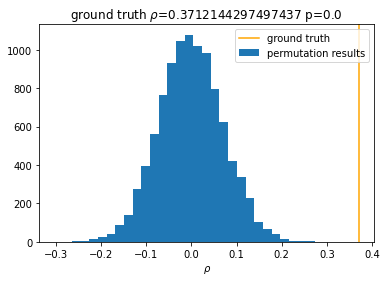

(0.3712144297497437, 0.0)

In [4]:
icn_stats.permutationTestSpearmansRho(df["Leave one channel out"], df["Decoding Performance "+r"$R^2$"], True, r"$\rho$", 10000)

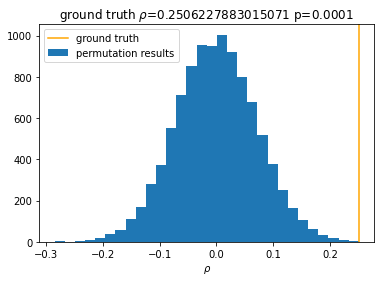

(0.2506227883015071, 0.0001)

In [5]:
icn_stats.permutationTestSpearmansRho(df["Leave one patient out"], df["Decoding Performance "+r"$R^2$"], True, r"$\rho$", 10000)

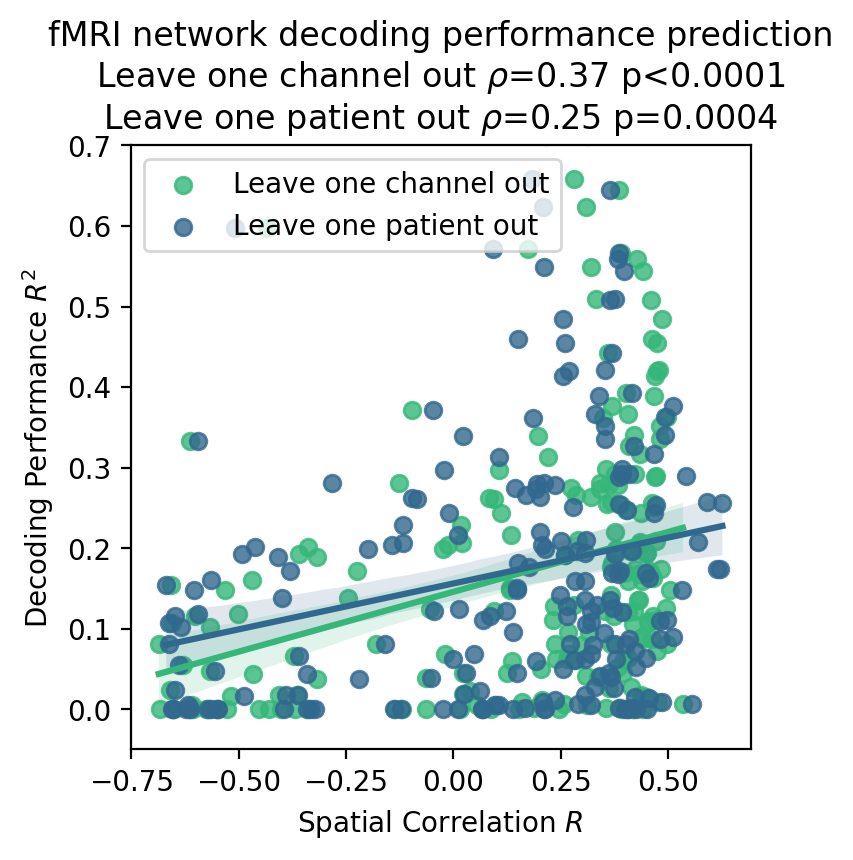

In [4]:
# make leave one channel and leave one patient out in one plot 
plt.figure(figsize=(4,4), dpi=200)
sns.regplot(x="Leave one channel out", y="Decoding Performance "+r"$R^2$", data=df, label="Leave one channel out", color=(53/255,183/255,121/255))
sns.regplot(x="Leave one patient out", y="Decoding Performance "+r"$R^2$", data=df, label="Leave one patient out", color=(49/255,104/255,142/255))
plt.legend()
plt.xlabel("Spatial Correlation "+r"$R$")
plt.ylim(-0.05, 0.7)
plt.title("fMRI network decoding performance prediction\n"+
         "Leave one channel out "+r"$\rho$"+"=0.37 p<0.0001\n"+
         "Leave one patient out "+r"$\rho$"+"=0.25 p=0.0004")
plt.savefig("Figure 7 fMRI.pdf", bbox_inches='tight', dpi=300)

### Fiber Tracking

In [5]:
dat = loadmat('single_channel_arr_R2_fMRI_DTI_LM.mat')
df = pd.DataFrame(np.array([dat["CV"]["regressor"], io.loadmat('fiber_tracking_res/predict_leave_one_channel_out.mat')["Ihat"][:,0],
                            io.loadmat('fiber_tracking_res/predict_leave_one_patient_out.mat')["Ihat"][:,0]]).T)
df.columns = ["Decoding Performance "+r"$R^2$", "Leave one channel out", "Leave one patient out"]


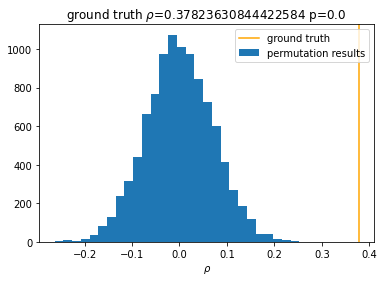

(0.37823630844422584, 0.0)

In [9]:
icn_stats.permutationTestSpearmansRho(df["Leave one channel out"], df["Decoding Performance "+r"$R^2$"], True, r"$\rho$", 10000)

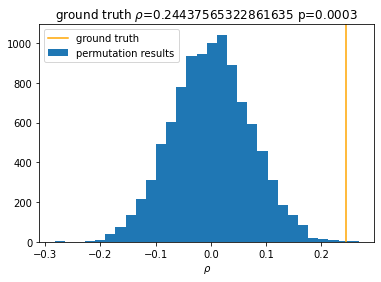

(0.24437565322861635, 0.0003)

In [10]:
icn_stats.permutationTestSpearmansRho(df["Leave one patient out"], df["Decoding Performance "+r"$R^2$"], True, r"$\rho$", 10000)

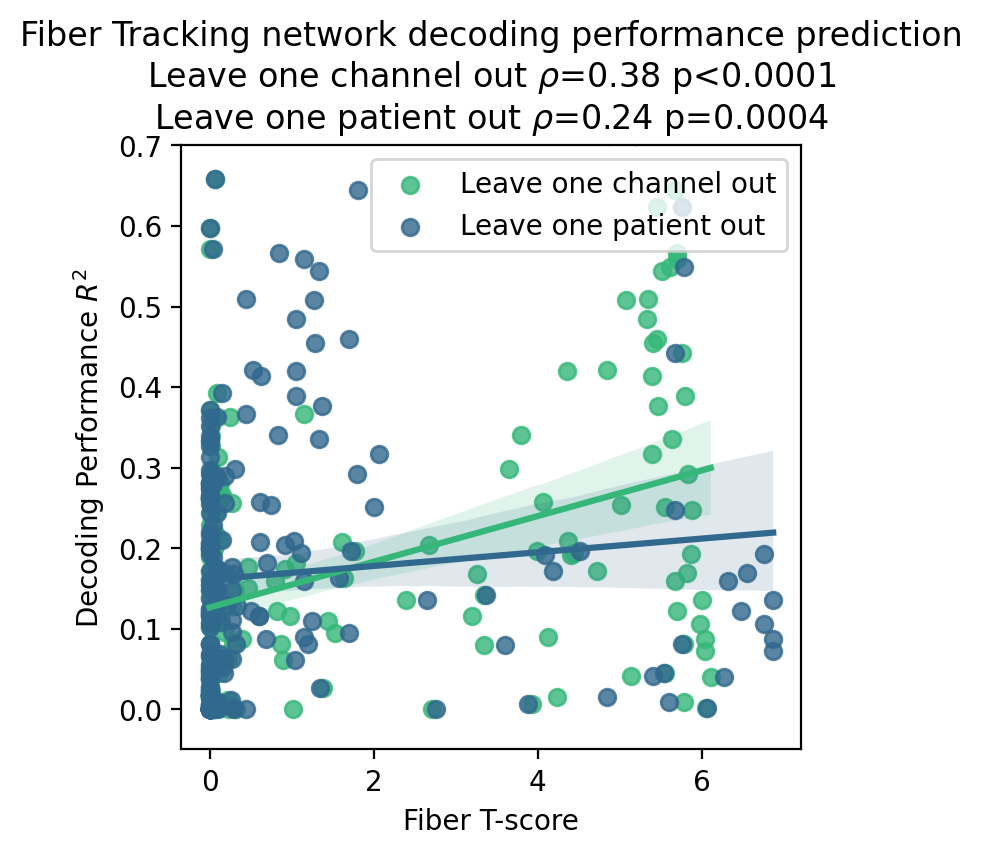

In [6]:
# make leave one channel and leave one patient out in one plot 
plt.figure(figsize=(4,4), dpi=200)
sns.regplot(x="Leave one channel out", y="Decoding Performance "+r"$R^2$", data=df, label="Leave one channel out", color=(53/255,183/255,121/255))
sns.regplot(x="Leave one patient out", y="Decoding Performance "+r"$R^2$", data=df, label="Leave one patient out", color=(49/255,104/255,142/255))
plt.legend()
plt.xlabel("Fiber T-score")
plt.ylim(-0.05, 0.7)
plt.title("Fiber Tracking network decoding performance prediction\n"+
         "Leave one channel out "+r"$\rho$"+"=0.38 p<0.0001\n"+
         "Leave one patient out "+r"$\rho$"+"=0.24 p=0.0004")
plt.savefig("Figure 7 FiberTracking.pdf", bbox_inches='tight', dpi=300)